In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(0)

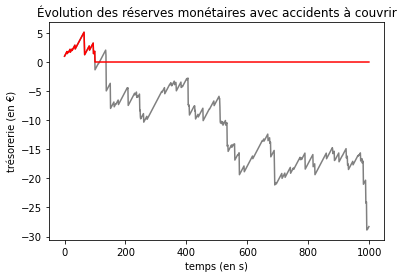

In [3]:
N = 1000  # Durée totale (en s)
T = np.arange(N)  # Indices des temps
c = 0.1  # Débit d'argent rentrant (en €/s)
lambda_T = 0.1  # Paramètre de la loi de Poisson pour les durées entre sinistres
ix = np.cumsum(np.append(np.zeros(2, dtype=int), np.random.poisson(lambda_T, N)))  # Indices cumulés des événements de Poisson
x_max = int(N * lambda_T + 5 * np.sqrt((N * lambda_T)))  # Taille fixe du tableau des sinistres potentiels (jusqu'à +5*sigma)
lambda_X = 1
x = np.random.exponential(1 / lambda_X, x_max)  # Coûts des sinistres

s = lambda x, ix: np.vectorize(lambda i: np.sum(x[ix[i]: ix[i+1]]))  # Discrétisation des sinistres
X = s(x, ix)(T)  # Total à payer (en €/s)
u = 1 + c * np.arange(N) - np.cumsum(X)
u_alive = ~np.cumsum(u<0).astype(bool)
u_cutted = u*(u_alive)

plt.title("Évolution des réserves monétaires avec accidents à couvrir")
plt.xlabel("temps (en s)")
plt.ylabel("trésorerie (en €)")
# plt.scatter(T, u, c=np.array(['b', 'r'])[(u<0).astype(int)])
plt.plot(u, c='gray')
plt.plot(u_cutted, c=np.array(['r', 'b'])[(u_alive[-1]).astype(int)])
plt.show()

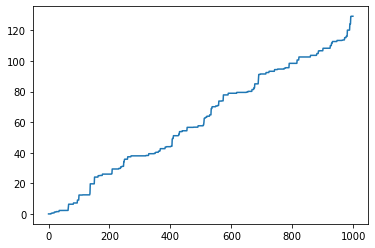

In [4]:
plt.plot(np.cumsum(X))
plt.show()

$u_{n} = 1 + c n - S_{n}$ où $S_{n} = \sum_{i = 0}^{N_{n}} X_i$.

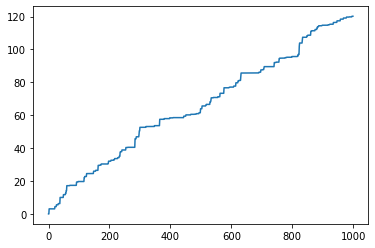

In [5]:
dN1 = np.random.poisson(lambda_T, N)
dX1 = np.random.exponential(1 / lambda_X, (N, 5))
dS1 = np.sum((np.arange(5) < dN1.reshape(N, 1)) * dX1, axis=1)
S1 = np.cumsum(dS1)
plt.plot(S1)
plt.show()

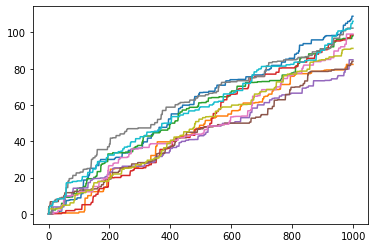

In [6]:
n_samples_per_time_unit = 1 + int(lambda_T + 5 * np.sqrt(lambda_T))
M = 10
dN = np.random.poisson(lambda_T, (M, N))
dX = np.random.exponential(1 / lambda_X, (M, N, n_samples_per_time_unit))
dS = np.sum((np.arange(n_samples_per_time_unit) < dN.reshape(M, N, 1)) * dX, axis=2)
S = np.cumsum(dS, axis=1)
plt.plot(S.T)
plt.show()

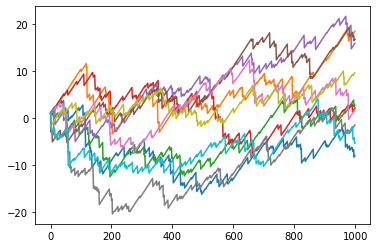

In [7]:
u = 1 + c * np.arange(N) - S
plt.plot(u.T)
plt.show()

In [8]:
u_alive = ~np.cumsum(u<0, axis=1).astype(bool)
u_cutted = u*(u_alive)

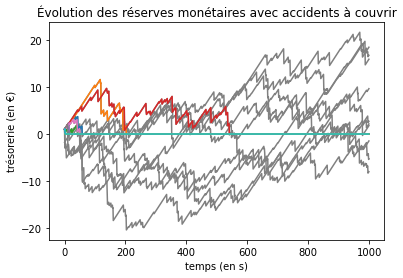

In [9]:
plt.title("Évolution des réserves monétaires avec accidents à couvrir")
plt.xlabel("temps (en s)")
plt.ylabel("trésorerie (en €)")
plt.plot(u.T, c='gray')
plt.plot(u_cutted.T)
# plt.plot(u_cutted.T, c=np.array(['r', 'b'])[(u_alive[:, -1]).astype(int)])
plt.show()